# Mathematical calculation

In [17]:
import numpy as np
from scipy import interpolate
import scipy
from scipy.integrate import simps
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Interpolation (線形補間)
- is used to estimate data points between two known points.
- most common interpolation technique is **Linear Interpolation**
- Other are **Quadratic**,**Cubic**,**Spline**,..

<img src="https://i2.wp.com/www.bradleysawler.com/wp-content/uploads/2018/01/Linear-Interpolation-Equation-Graph.png?fit=838%2C659&ssl=1" width=300 >

<hr>

### Interpolate a 1-D function

- Numpy : [numpy.interp(x, xp, fp, left=None, right=None, period=None)](https://numpy.org/doc/stable/reference/generated/numpy.interp.html)
- Scipy : [scipy.interpolate.interp1d(x, y, kind='linear', axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

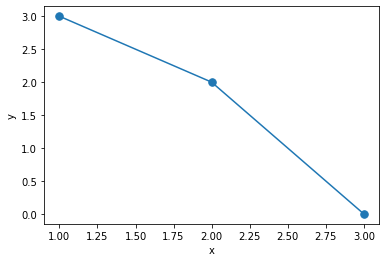

In [2]:
x = [1,2,3]
y = [3,2,0]
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,marker='.',ms = 15)

Given x_new value : 2.5
New interpolated value (y_new): 1.0


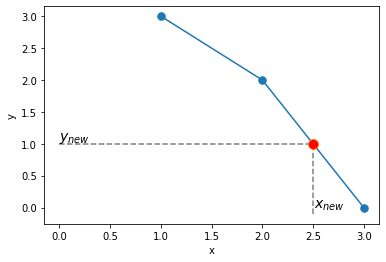

In [3]:
x = [1,2,3]
y = [3,2,0]

x_new = 2.5 # new value of x ,so we need to find new value of y
y_new = np.interp(x_new,x,y) # using NumPy library
print('Given x_new value : {}'.format(x_new))
print('New interpolated value (y_new): {}'.format(y_new))

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,marker='.',ms = 15)

plt.plot([x_new,x_new],[-0.1,y_new],'--',color="gray")
plt.plot([0,x_new],[y_new,y_new],'--',color="gray")
plt.plot(x_new,y_new,marker='o',ms = 10,mfc='red') # ms:markersize ,mfc:markerfacecolor
plt.text(x_new+0.01,0,r'$x_{new}$',fontsize=14)
plt.text(0,y_new+0.05,r'$y_{new}$',fontsize=14)
plt.show()

Given x_new value : 2.5
New interpolated value (y_new): 1.0


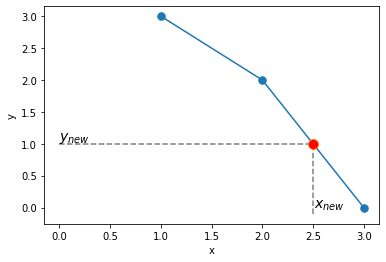

In [4]:
x = [1,2,3]
y = [3,2,0]
f = interpolate.interp1d(x,y)  # using SciPy library , take 2 arrays as arguments

x_new = 2.5 # new value of x ,so we need to find new value of y
y_new = f(x_new) 
print('Given x_new value : {}'.format(x_new))
print('New interpolated value (y_new): {}'.format(y_new))

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,marker='.',ms = 15)

plt.plot([x_new,x_new],[-0.1,y_new],'--',color="gray")
plt.plot([0,x_new],[y_new,y_new],'--',color="gray")
plt.plot(x_new,y_new,marker='o',ms = 10,mfc='red') # ms:markersize ,mfc:markerfacecolor
plt.text(x_new+0.01,0,r'$x_{new}$',fontsize=14)
plt.text(0,y_new+0.05,r'$y_{new}$',fontsize=14)
plt.show()

<hr>

### Interpolate a 2-D function
- Scipy : [scipy.interpolate.interp2d(x, y, z, kind='linear', copy=True, bounds_error=False, fill_value=None)[source]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d)

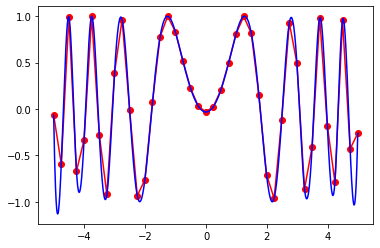

In [5]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z,kind='cubic')

xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

<hr>

# Numerical intergration using trapezoidal rule and Simpson (数値積分：台形公式とシンプソン則)

<img src="https://www.bragitoff.com/wp-content/uploads/2015/08/TrapezoidRule1.png" width=300 >
$${\int\limits_a^b {f\left( x \right)dx} \approx {T_n} }={ {\frac{{\Delta x}}{2}}\left[ {{f\left( {{x_0}} \right)} + {2f\left( {{x_1}} \right)} }\right.}+{\left.{ {2f\left( {{x_2}} \right)} + \cdots }\right.}+{\left.{ {2f\left( {{x_{n – 1}}} \right)} + {f\left( {{x_n}} \right)}} \right],}$$
$$\Delta x=h=\frac{b-a}{n}\; ,\;  {x_i} = a + i\Delta x.$$
<hr>

Numpy : [numpy.trapz(y, x=None, dx=1.0, axis=-1)](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html) <br>
      : [numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [6]:
from math import sin,pi
#TRAPEZOIDAL RULE
f = lambda x: x*sin(x)
a = 0         # lower limit
b = pi/2      # upper limit
n = 5         # number of divisions/subintervals
h = (b-a)/n   # step size

S = 0.5*(f(a)+f(b))
for i in range(1,n): #this loop will run until (n-1)
    S+=f(a+i*h)
integral = h*S

print('h = ',round(h,6))
print("Integral = {}".format(integral))

h =  0.314159
Integral = 1.0082654169662284


In [7]:
#TRAPEZOIDAL RULE
a = 0         # lower limit
b = pi/2         # upper limit
n = 5         # number of divisions/subintervals
h = (b-a)/n   # step size

x = np.linspace(a,b,num=n+1)
y = x*np.sin(x)

trap = np.trapz(y,x,dx=h)
print('h= ',round(h,6))
print("Integral = {}".format(trap))

h=  0.314159
Integral = 1.0082654169662284


In [8]:
f = lambda x: x**2
#TRAPEZOIDAL RULE
a = 0         # lower limit
b = 2         # upper limit
n = 3         # number of divisions/subintervals
h = (b-a)/n   # step size

S = 0.5*(f(a)+f(b))
for i in range(1,n): #this loop will run until (n-1)
    S+=f(a+i*h)
    
integral = h*S
print('h= ',round(h,6))
print("Integral = {}".format(integral))

h=  0.666667
Integral = 2.814814814814815


In [9]:
#TRAPEZOIDAL RULE
a = 0         # lower limit
b = 2         # upper limit
n = 3         # number of divisions/subintervals
h = (b-a)/n   # step size

x = np.linspace(a,b,num=n+1)
y = x**2

trap = np.trapz(y,x,dx=h)
print('h= ',round(h,6))
print("Integral = {}".format(trap))

h=  0.666667
Integral = 2.814814814814815


Reference 
- [Trapezoidal Rule](https://www.math24.net/trapezoidal-rule#:~:text=Another%20useful%20integration%20rule%20is,little%20trapezoids%20rather%20than%20rectangles.&text=a%3Dx0%3Cx1,%E2%8B%AF%3Cxn%3Db)
- [Simpson's Rule](https://www.math24.net/simpsons-rule)

<img src="https://www.aplustopper.com/wp-content/uploads/2017/06/What-are-the-Trapezoidal-rule-and-Simpsons-rule-in-Numerical-Integration-1.jpg" width=300 >

( $h$is width of subinterval, $n$ must be even )

$$\int _0^5\:x^3dx \approx [\frac{1}{4}x^4]_0^5 = 156.25$$

In [10]:
a = 0         # lower limit
b = 5        # upper limit
n = 100         # number of divisions/subintervals
h = (b-a)/n   # step size

x = np.linspace(a,b,num=n+1)
y = x**3

Integral = scipy.integrate.simpson(y, x,dx=h)

print(Integral)

156.25


$$\int\limits_0^\pi {sin (x)\;dx} \approx [-\sin x]_0^\pi = 2$$

In [11]:
a = 0         # lower limit
b = np.pi       # upper limit
n = 10         # number of divisions/subintervals
h = (b-a)/n   # step size

x = np.linspace(a,b,num=n+1)
y = np.sin(x)

Integral = scipy.integrate.simpson(y, x,dx=h)

print(Integral)

2.0001095173150043


# Addition / Subtraction / Multiplication of matrix

In [12]:
#create first matrix
A = np.array([[1,2,1],[3,4,1]])
print("Matrix A :")
print(A)

#create second matrix
B = np.array([[5,6,1],[7,8,1]])
print("Matrix B :")
print(B)
print(" ")

# adding two matrix
print('Matrix A + Matrix B')
C = np.add(A,B)
print(C)

Matrix A :
[[1 2 1]
 [3 4 1]]
Matrix B :
[[5 6 1]
 [7 8 1]]
 
Matrix A + Matrix B
[[ 6  8  2]
 [10 12  2]]


In [13]:
#create first matrix
A = np.array([[5,6,1],[7,8,1]])

print("Matrix A :")
print(A)

#create second matrix
B = np.array([[1,2,1],[3,4,1]])
print("Matrix B :")
print(B)
print(" ")

# adding two matrix
print('Matrix A - Matrix B = ')
C = np.subtract(A,B)
print(C)

Matrix A :
[[5 6 1]
 [7 8 1]]
Matrix B :
[[1 2 1]
 [3 4 1]]
 
Matrix A - Matrix B = 
[[4 4 0]
 [4 4 0]]


In [14]:
# take a 3x3 matrix
X = [[12,7,3],
     [4,5,6],
     [7,8,9]]

# take a 3x4 matrix
Y = [[5,8,1,2],
     [6,7,3,0],
     [4,5,9,1]]

result = [[0,0,0,0],
         [0,0,0,0],
         [0,0,0,0]]

# iterating by rows of A
for i in range(len(A)):
  
    # iterating by columns of B 
    for j in range(len(B[0])):
  
        # iterating by rows of B
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]
  
            
print("Matrix X :")
print(X)

print("Matrix Y :")
print(Y)
print(" ")

print('Multiplication of matrix X and matrix Y : ')
for r in result:
    print(r)

Matrix X :
[[12, 7, 3], [4, 5, 6], [7, 8, 9]]
Matrix Y :
[[5, 8, 1, 2], [6, 7, 3, 0], [4, 5, 9, 1]]
 
Multiplication of matrix X and matrix Y : 
[23, 34, 11, 0]
[31, 46, 15, 0]
[0, 0, 0, 0]


In [16]:
# take a 3x3 matrix
X = [[12,7,3],
     [4,5,6],
     [7,8,9]]

# take a 3x4 matrix
Y = [[5,8,1,2],
     [6,7,3,0],
     [4,5,9,1]]

# this will be 3x4 matrix
result = np.dot(X,Y)
            
print("Matrix X :")
print(X)

print("Matrix Y :")
print(Y)
print(" ")

print('Multiplication of matrix X and matrix Y : ')
for r in result:
    print(r)

Matrix X :
[[12, 7, 3], [4, 5, 6], [7, 8, 9]]
Matrix Y :
[[5, 8, 1, 2], [6, 7, 3, 0], [4, 5, 9, 1]]
 
Multiplication of matrix X and matrix Y : 
[114 160  60  27]
[74 97 73 14]
[119 157 112  23]


# Eigenvector and eigenvalue (固有ベクトル・固有値)
#### Reference :
- [Mathematical Python : Eigenvalues and Eigenvectors](https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/eigenvalues-eigenvectors/)
- [Eigenvector and Eigenvalue](https://www.mathsisfun.com/algebra/eigenvalue.html)